Consider i.i.d. sample $(x_1, x_2, x_3)$ from some random variable $X$ with finite expected value and variance. Let $f(x_1, x_2, x_3)=0.3 x_1 + 0.2 x_2 + c x_3$ be estimator for population mean $\mathbb EX$. Find value of parameter $c$ such that $f$ is consistent estimator.

_To make your estimator consistent you have to demand that $\mathbb Ef(x_1, x_2, x_3)=\mathbb EX$. Use properties of expected value to rewrite this condition as an equation on $c$ and solve it._

$\mathbb Ef(x_1, x_2, x_3) = \mathbb E(0.3 x_1 + 0.2 x_2 + c x_3) 
= 0.3\mathbb{E}(x_1) + 0.2\mathbb{E}(x_2) + c\mathbb{E}(x_3) = (0.3 + 0.2 + c)\mathbb{E}(X)$

$\implies \mathbb Ef(x_1, x_2, x_3)=\mathbb EX$ when $c = 0.5$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
population = [2,5,2,10,6]
sample_size = 7
pop_mean = np.mean(population)
# estimate population mean by `sample`
sample = np.random.choice(population, size = sample_size)

In [3]:
def test_consistency(population, estimator, min_size=10, max_size=1000000, size_step=100):
    """
    test consistency of a estimator
    """
    estimates = []
    sample_sizes = range(min_size, max_size, size_step)
    pop_mean = np.mean(population)
    
    for sample_size in sample_sizes:
        sample = np.random.choice(population, size = sample_size)
        estimate = estimator(sample)
        estimates.append(estimate)
        
    fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
    
    ax1.plot(sample_sizes, estimates, '.', label='estimate')
    ax1.plot(sample_sizes, np.ones_like(sample_sizes) * pop_mean)
    
    ax2.plot(sample_sizes, np.abs(np.array(estimates) - pop_mean), '.')
    ax2.plot(sample_sizes, np.zeros_like(sample_sizes))

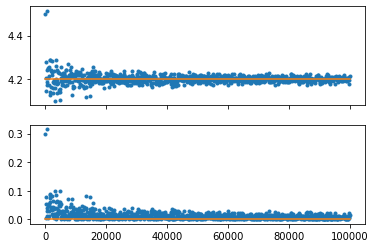

In [4]:
population = [1,5,4,2,9]
test_consistency(population, np.mean, max_size=100000)

In [5]:
def first_element(sample):
    return sample[0]

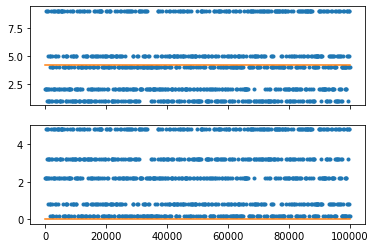

In [6]:
test_consistency(population, first_element, max_size=100000)

In [7]:
def mid_range(sample):
    return (np.max(sample) + np.min(sample))/2

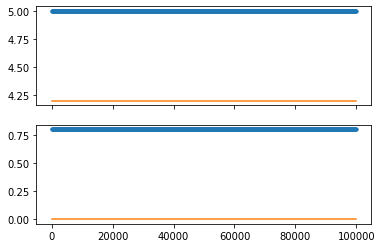

In [8]:
test_consistency(population, mid_range, max_size=100000)

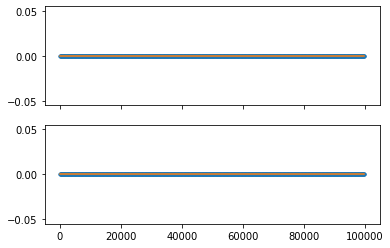

In [9]:
test_consistency([1,-1,2,-2], mid_range, max_size=100000)

In [10]:
def mean_with_coeff(sample):
    n=len(sample)
    return np.mean(sample) * n/(n-1)

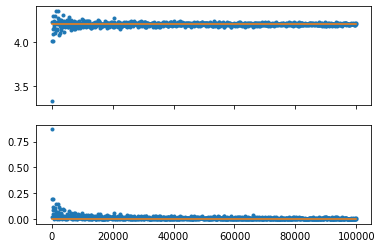

In [11]:
test_consistency(population, mean_with_coeff, max_size=100000)